In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model import BB_Model
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Classes_Container


In [2]:
# Load Diabetes model

Diabetes_Data = BB_Model('Diabetes')

Diabetes_Data.df().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
Diabetes_Data.MPL()

0.6168831168831169


MLPClassifier(random_state=RandomState(MT19937) at 0x21B4A501C40)

In [4]:
Diabetes_Data.Random_Forest()

0.7792207792207793


RandomForestClassifier(random_state=RandomState(MT19937) at 0x21B4A501C40)

In [5]:
print(Diabetes_Data.get_features())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [6]:
# LIME Explanation for Training Data
from lime import lime_tabular

X_train, X_test, y_train, y_test = Diabetes_Data.get_TT_data()

LIME_Exp = lime_tabular.LimeTabularExplainer(training_data=X_train,
                                             mode=Diabetes_Data.get_mode(),
                                             #training_labels=None,
                                             feature_names=Diabetes_Data.get_features(),
                                             categorical_features=Diabetes_Data.get_catagorical(),
                                             #categorical_names=None,
                                             #kernel_width=None,
                                             #kernel=None,
                                             verbose=False,
                                             #class_names=None,
                                             #feature_selection='auto',
                                             discretize_continuous=False,
                                             #discretizer='quartile',
                                             sample_around_instance=True)
                                             #random_state=None,
                                             #training_data_stats=None)
        


In [9]:
# Generate explantion data for Random Forest

Diabetes_Stats = Feature_Statistics(feature_names = Diabetes_Data.get_features(), mode='classification', classes=Diabetes_Data.get_classes())

for test_instance in range(X_test.shape[0]):

    data_row  = X_test[test_instance,:]
    
    explain_inst = LIME_Exp.explain_instance(data_row=data_row,
                                             predict_fn=Diabetes_Data.get_Random_Forest().predict_proba,
                                             #labels=None,
                                             #top_labels=None,
                                             #num_features=10,
                                             num_samples=100,
                                             #distance_metric='euclidean',
                                             #model_regressor=None,
                                             sampling_method='gaussian')
    
    y_predict = Diabetes_Data.get_Random_Forest().predict_proba(data_row.reshape(1, -1))

    print('INSTANCE: ', test_instance)
    
    Diabetes_Stats.Add_LIME_Sample(sample     = explain_inst.as_list(),
                                   outcome    = y_test[test_instance],
                                   prediction = y_predict)
    
    last_instance = test_instance

INSTANCE:  0
INSTANCE:  1
INSTANCE:  2
INSTANCE:  3
INSTANCE:  4
INSTANCE:  5
INSTANCE:  6
INSTANCE:  7
INSTANCE:  8
INSTANCE:  9
INSTANCE:  10
INSTANCE:  11
INSTANCE:  12
INSTANCE:  13
INSTANCE:  14
INSTANCE:  15
INSTANCE:  16
INSTANCE:  17
INSTANCE:  18
INSTANCE:  19
INSTANCE:  20
INSTANCE:  21
INSTANCE:  22
INSTANCE:  23
INSTANCE:  24
INSTANCE:  25
INSTANCE:  26
INSTANCE:  27
INSTANCE:  28
INSTANCE:  29
INSTANCE:  30
INSTANCE:  31
INSTANCE:  32
INSTANCE:  33
INSTANCE:  34
INSTANCE:  35
INSTANCE:  36
INSTANCE:  37
INSTANCE:  38
INSTANCE:  39
INSTANCE:  40
INSTANCE:  41
INSTANCE:  42
INSTANCE:  43
INSTANCE:  44
INSTANCE:  45
INSTANCE:  46
INSTANCE:  47
INSTANCE:  48
INSTANCE:  49
INSTANCE:  50
INSTANCE:  51
INSTANCE:  52
INSTANCE:  53
INSTANCE:  54
INSTANCE:  55
INSTANCE:  56
INSTANCE:  57
INSTANCE:  58
INSTANCE:  59
INSTANCE:  60
INSTANCE:  61
INSTANCE:  62
INSTANCE:  63
INSTANCE:  64
INSTANCE:  65
INSTANCE:  66
INSTANCE:  67
INSTANCE:  68
INSTANCE:  69
INSTANCE:  70
INSTANCE:  71
IN

In [10]:
Diabetes_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

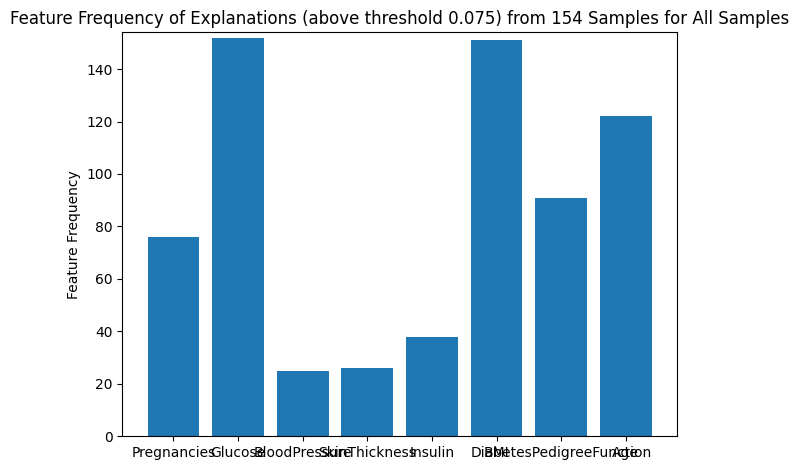

In [11]:
Diabetes_Stats.Frequency_Plot()

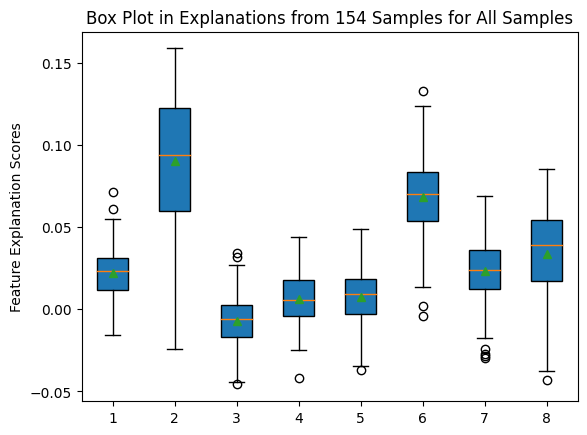

1 -      Pregnancies
2 -      Glucose
3 -      BloodPressure
4 -      SkinThickness
5 -      Insulin
6 -      BMI
7 -      DiabetesPedigreeFunction
8 -      Age


In [12]:
Diabetes_Stats.Box_Plot()

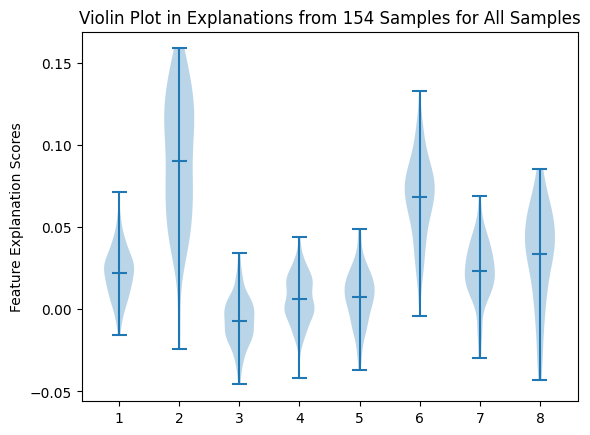

1 -      Pregnancies
2 -      Glucose
3 -      BloodPressure
4 -      SkinThickness
5 -      Insulin
6 -      BMI
7 -      DiabetesPedigreeFunction
8 -      Age


In [13]:
Diabetes_Stats.Violin_Plot(top_features=False)

In [17]:
Diabetes_Container = Classes_Container(Diabetes_Stats)

Diabetes_Container.Feature_Counts(max_features=11, scaled=True, threshold=0.1)


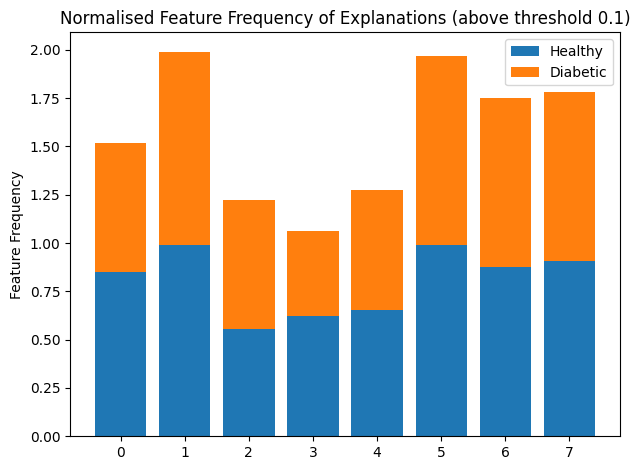

0 -      Pregnancies
1 -      Glucose
2 -      BloodPressure
3 -      SkinThickness
4 -      Insulin
5 -      BMI
6 -      DiabetesPedigreeFunction
7 -      Age


In [18]:
Diabetes_Container.Frequency_Plot()